<a id="import"></a>
# <p style= "width: 95%; border-radius:15px 50px; border: #0000FF solid; padding: 12px; background-color: #87CEEB; font-size:120%; color: black; text-align:center;">Step 1 | Import Libraries</p>



⬆️[Tabel of Contents](#contents_tabel)

In [1]:
import pickle
import warnings

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

warnings.filterwarnings('ignore')
warnings.warn('ignore')

<a id="read"></a>
# <p style= "width: 95%; border-radius:15px 50px; border: #0000FF solid; padding: 12px; background-color: #87CEEB; font-size:120%; color: black; text-align:center;">Step 2 | Read Dataset</p>

⬆️[Tabel of Contents](#contents_tabel)

## Import

In [2]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


<a id="overview"></a>
# <p style= "width: 95%; border-radius:15px 50px; border: #0000FF solid; padding: 12px; background-color: #87CEEB; font-size:120%; color: black; text-align:center;">Step 3 | Dataset Overview</p>

⬆️[Tabel of Contents](#contents_tabel)

<a id="basic"></a>
# <b><span style='color:#0000FF;'>Step 3.1 |</span><span style='color:#0000FF;'> Dataset Basic Information</span></b>  


In [3]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [22]:
df.duplicated().sum()

0

<div style="width: 95%; border-radius:10px; border: #0000FF solid; padding: 12px; background-color: #87CEEB; font-size:110%; color: black; text-align:justify">

* This dataset contains information from __2000__ mobile phones. 
* There are __21 variables__:
    1. __20 independent variables__ 
    2. __1 dependent variable__
* There are no __missing values__ in the dataset.
* There are no __duplicates__
* There are __7 categorical variables__: `price_range`, `blue`, `dual_sim`, `four_g`, `three_g`, `touch_screen`, and `wifi`
* We have __14 numeric variables__: `battery_power`, `clock_speed`, `fc`, `int_memory`, `m_dep`, `mobile_wt`, `n_cores`, `pc`, `px_height`, `px_width`, `ram`, `talk_time`, `sc_h`, and `sc_w`

</div>

In [5]:
categories = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']

<a id="num_statistics"></a>
# <b><span style='color:#0000FF;'>Step 3.2 |</span><span style='color:#0000FF;'> Analysis of Numerical Variables</span></b>  

In [6]:
df.drop(columns = categories).describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.52,439.42,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52,0.82,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.31,4.34,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.05,18.15,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50,0.29,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.25,35.40,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52,2.29,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.92,6.06,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.11,443.78,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.52,432.20,500.0,874.75,1247.0,1633.00,1998.0


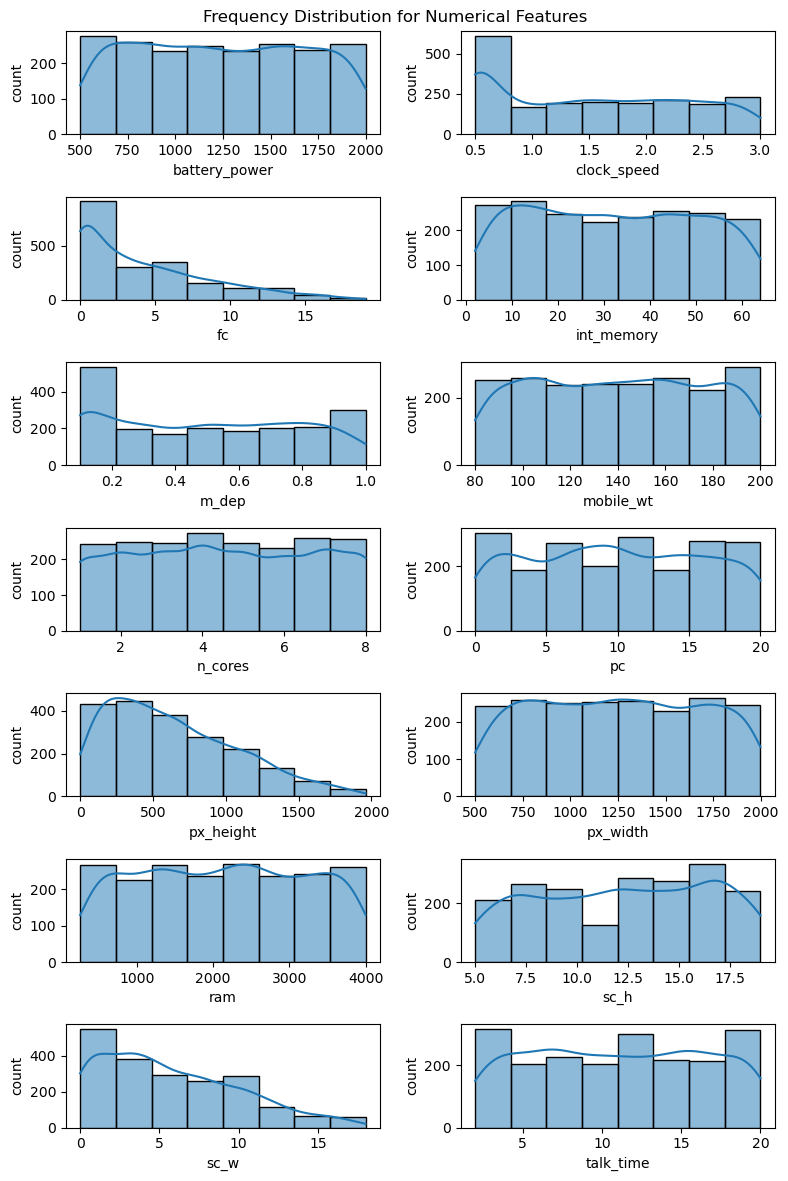

In [20]:
plt.figure(figsize = (8, 12))

for i, col in enumerate(df.drop(columns = categories).columns):
  
    
    ax = plt.subplot(7, 2, i+1)
    # ax.hist(x = col, data = df.drop(columns = categories))
    sns.histplot(data = df.drop(columns = categories), x = col, kde = True, bins = 8, ax = ax)
    ax.set_xlabel(col, fontsize = 10)
    ax.set_ylabel('count', fontsize = 10)
    
plt.suptitle("Frequency Distribution for Numerical Features")
plt.tight_layout()


The numerical features did not follow a normal distribution. Also, we can see some numerical features that are skewed to the right.

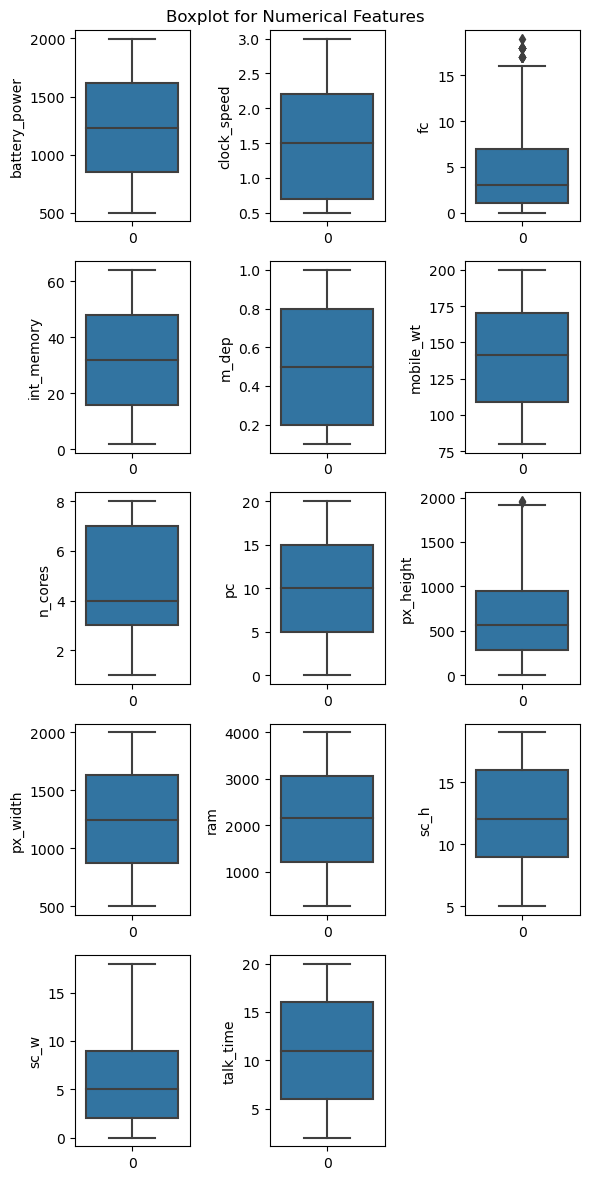

In [8]:
plt.figure(figsize = (6, 12))

for i, col in enumerate(df.drop(columns = categories).columns):
    ax = plt.subplot(5, 3, i+1)
    
    sns.boxplot(df[col], ax = ax)
    ax.set_ylabel(f'{col}', fontsize = 10)

plt.suptitle("Boxplot for Numerical Features")
plt.tight_layout()
plt.show();

<div style="width: 95%; border-radius:10px; border: #0000FF solid; padding: 12px; background-color: #87CEEB; font-size:110%; color: black; text-align:justify">


* __fc (Front Camera mega pixels)__, and __px_height (Pixel Resolution Height)__ are affected by __outlier__ or __noise__!

</div>

<a id="cat_statistics"></a>
# <b><span style='color:#0000FF;'>Step 3.3 |</span><span style='color:#0000FF;'> Analysis of Categorical Variables</span></b>

In [9]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

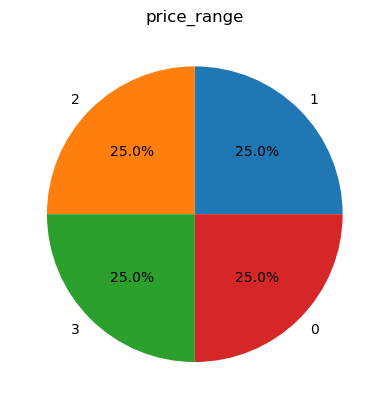

In [10]:
plt.pie(df['price_range'].value_counts(), labels=df['price_range'].value_counts().index, autopct='%1.1f%%');
plt.title('price_range');

Outcome variable is balanced.

In [11]:
count_values = {col : df[col].value_counts(normalize = True).values*100 for col in df[categories].drop(columns = 'price_range').columns}
count_values = pd.DataFrame.from_dict(count_values).T
count_values

,0,1
blue,50.50,49.50
dual_sim,50.95,49.05
four_g,52.15,47.85
three_g,76.15,23.85
touch_screen,50.30,49.70
wifi,50.70,49.30


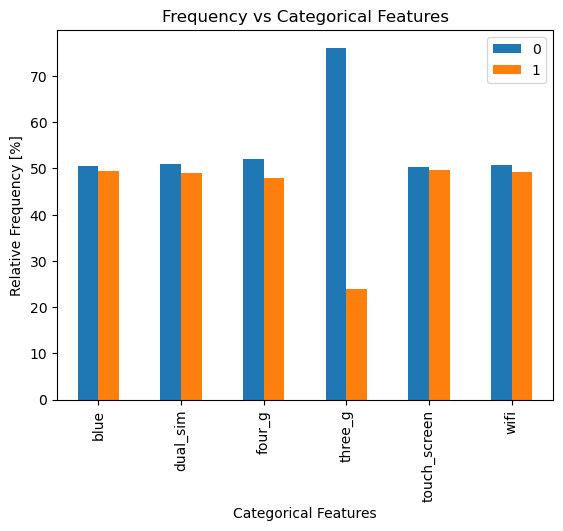

In [12]:
count_values.plot(kind = 'bar')
plt.xlabel('Categorical Features')
plt.ylabel('Relative Frequency [%]')
plt.title('Frequency vs Categorical Features');

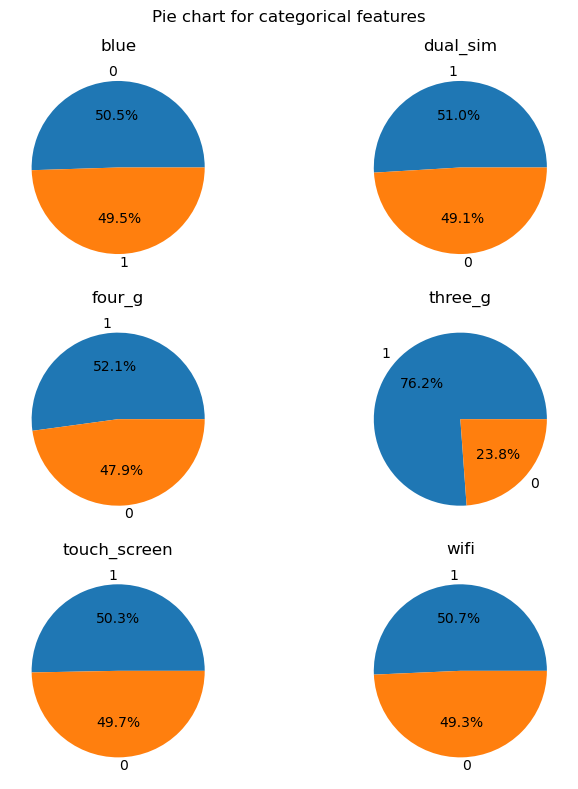

In [13]:
plt.figure(figsize = (8, 8))

for i, col in enumerate(df[categories].drop(columns = 'price_range').columns):
    plt.subplot(3, 2, i+1)
    plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%')
    plt.title(col)

plt.suptitle("Pie chart for categorical features")
plt.tight_layout()
plt.show();

<div style="width: 95%; border-radius:10px; border: #0000FF solid; padding: 12px; background-color: #87CEEB; font-size:110%; color: black; text-align:justify">


* Mobile phones are divided with exactly the __same frequency across the 4 price_range classes__. Therefore, __the dataset is completely balanced.__
* The mobile phones in the data set have almost the __same frequency__ in terms of having or not having __Bluetooth__, __4G__, __touch screen__, __Wifi__ as well as supporting __two SIM cards__ or not.
* Around 76% of the mobile phones support __3G__ whereas around 52% of the mobile phones support __4G__.

</div>

<a id="cleaning"></a>
# <p style= "width: 95%; border-radius:15px 50px; border: #0000FF solid; padding: 12px; background-color: #87CEEB; font-size:120%; color: black; text-align:center;">Step 4 | Data Cleaning</p>

⬆️[Tabel of Contents](#contents_tabel)

<a id="outlier"></a>
# <b><span style='color:#0000FF;'>Step 4.1 |</span><span style='color:#0000FF;'>  Outlier Detection</span></b>  

In [14]:
noisy_columns = ['fc', 'px_height']

In [15]:
n_noisy_row = []
for noisy_col in noisy_columns:
    low, high = df[noisy_col].quantile([0.05, 0.95])
    noisy_row = df[~df[noisy_col].between(low, high)].index
    n_noisy_row.append(len(noisy_row))


In [16]:
pd.DataFrame({
    'Noisy Columns' : noisy_columns,
    'Number of Noise' : n_noisy_row
})

,Noisy Columns,Number of Noise
0,fc,85
1,px_height,200


<div style="width: 95%; border-radius:10px; border: #0000FF solid; padding: 12px; background-color: #87CEEB; font-size:110%; color: black; text-align:justify">

- We have concluded __below 5%__ and __above 95%__ of the noisy columns as outliers. 
- As seen in the dataframe, the mobile phone with the __earliest technology__ and with the __latest modern technology__ might fall into the outliers.
</div>

<a id="correlation"></a>
# <b><span style='color:#0000FF;'>Step 4.2 |</span><span style='color:#0000FF;'>  Pearson Correlation</span></b>  

__Pearson Correlation__ is a statistical measure that calculates the strength and direction of the linear relationship between two variables, with values ranging from `-1` (perfect negative correlation) to `1` (perfect positive correlation).

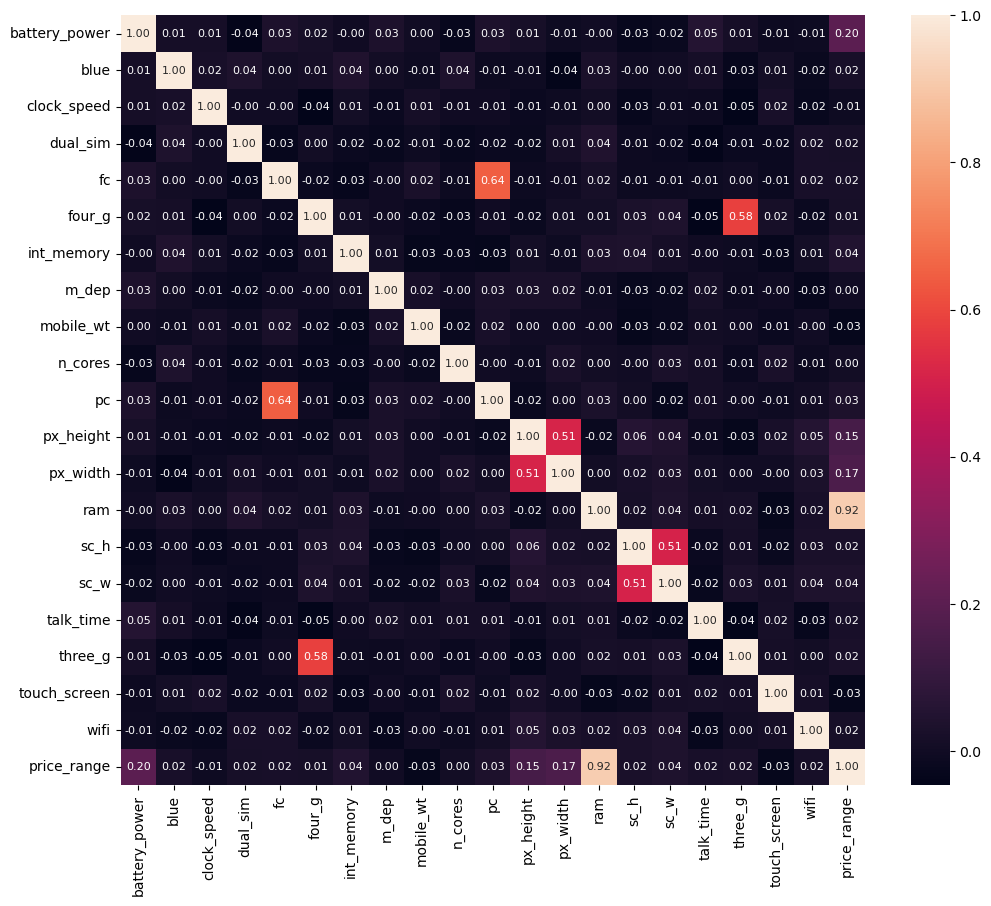

In [17]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot = True, fmt='.2f', annot_kws={'size': 8});

<div style="width: 95%; border-radius:10px; border: #0000FF solid; padding: 12px; background-color: #87CEEB; font-size:110%; color: black; text-align:justify">

* `price_range` is highly correlated with `ram` (ρ = 0.92).
* `price_range` has a low correlation value with the rest of the features, but this cannot be used as a criterion to remove these features since the pearson correlation only expresses the linear relationship between two variables.
* Among the features, two features ‍‍‍‍‍‍`pc` and `fc` have the highest correlation with each other (ρ = 0.64). Another two features ‍‍‍‍‍‍`three_g` and `four_g` are also correlated with each other (ρ = 0.58).
</div>

<a id="bivariate"></a>
# <p style= "width: 95%; border-radius:15px 50px; border: #0000FF solid; padding: 12px; background-color: #87CEEB; font-size:120%; color: black; text-align:center;">Step 5 | Bivariate Analysis</p>

⬆️[Tabel of Contents](#contents_tabel)

<a id="bivariate_num"></a>
# <b><span style='color:#0000FF;'>Step 5.1 |</span><span style='color:#0000FF;'>  Numerical Features vs price_range</span></b>

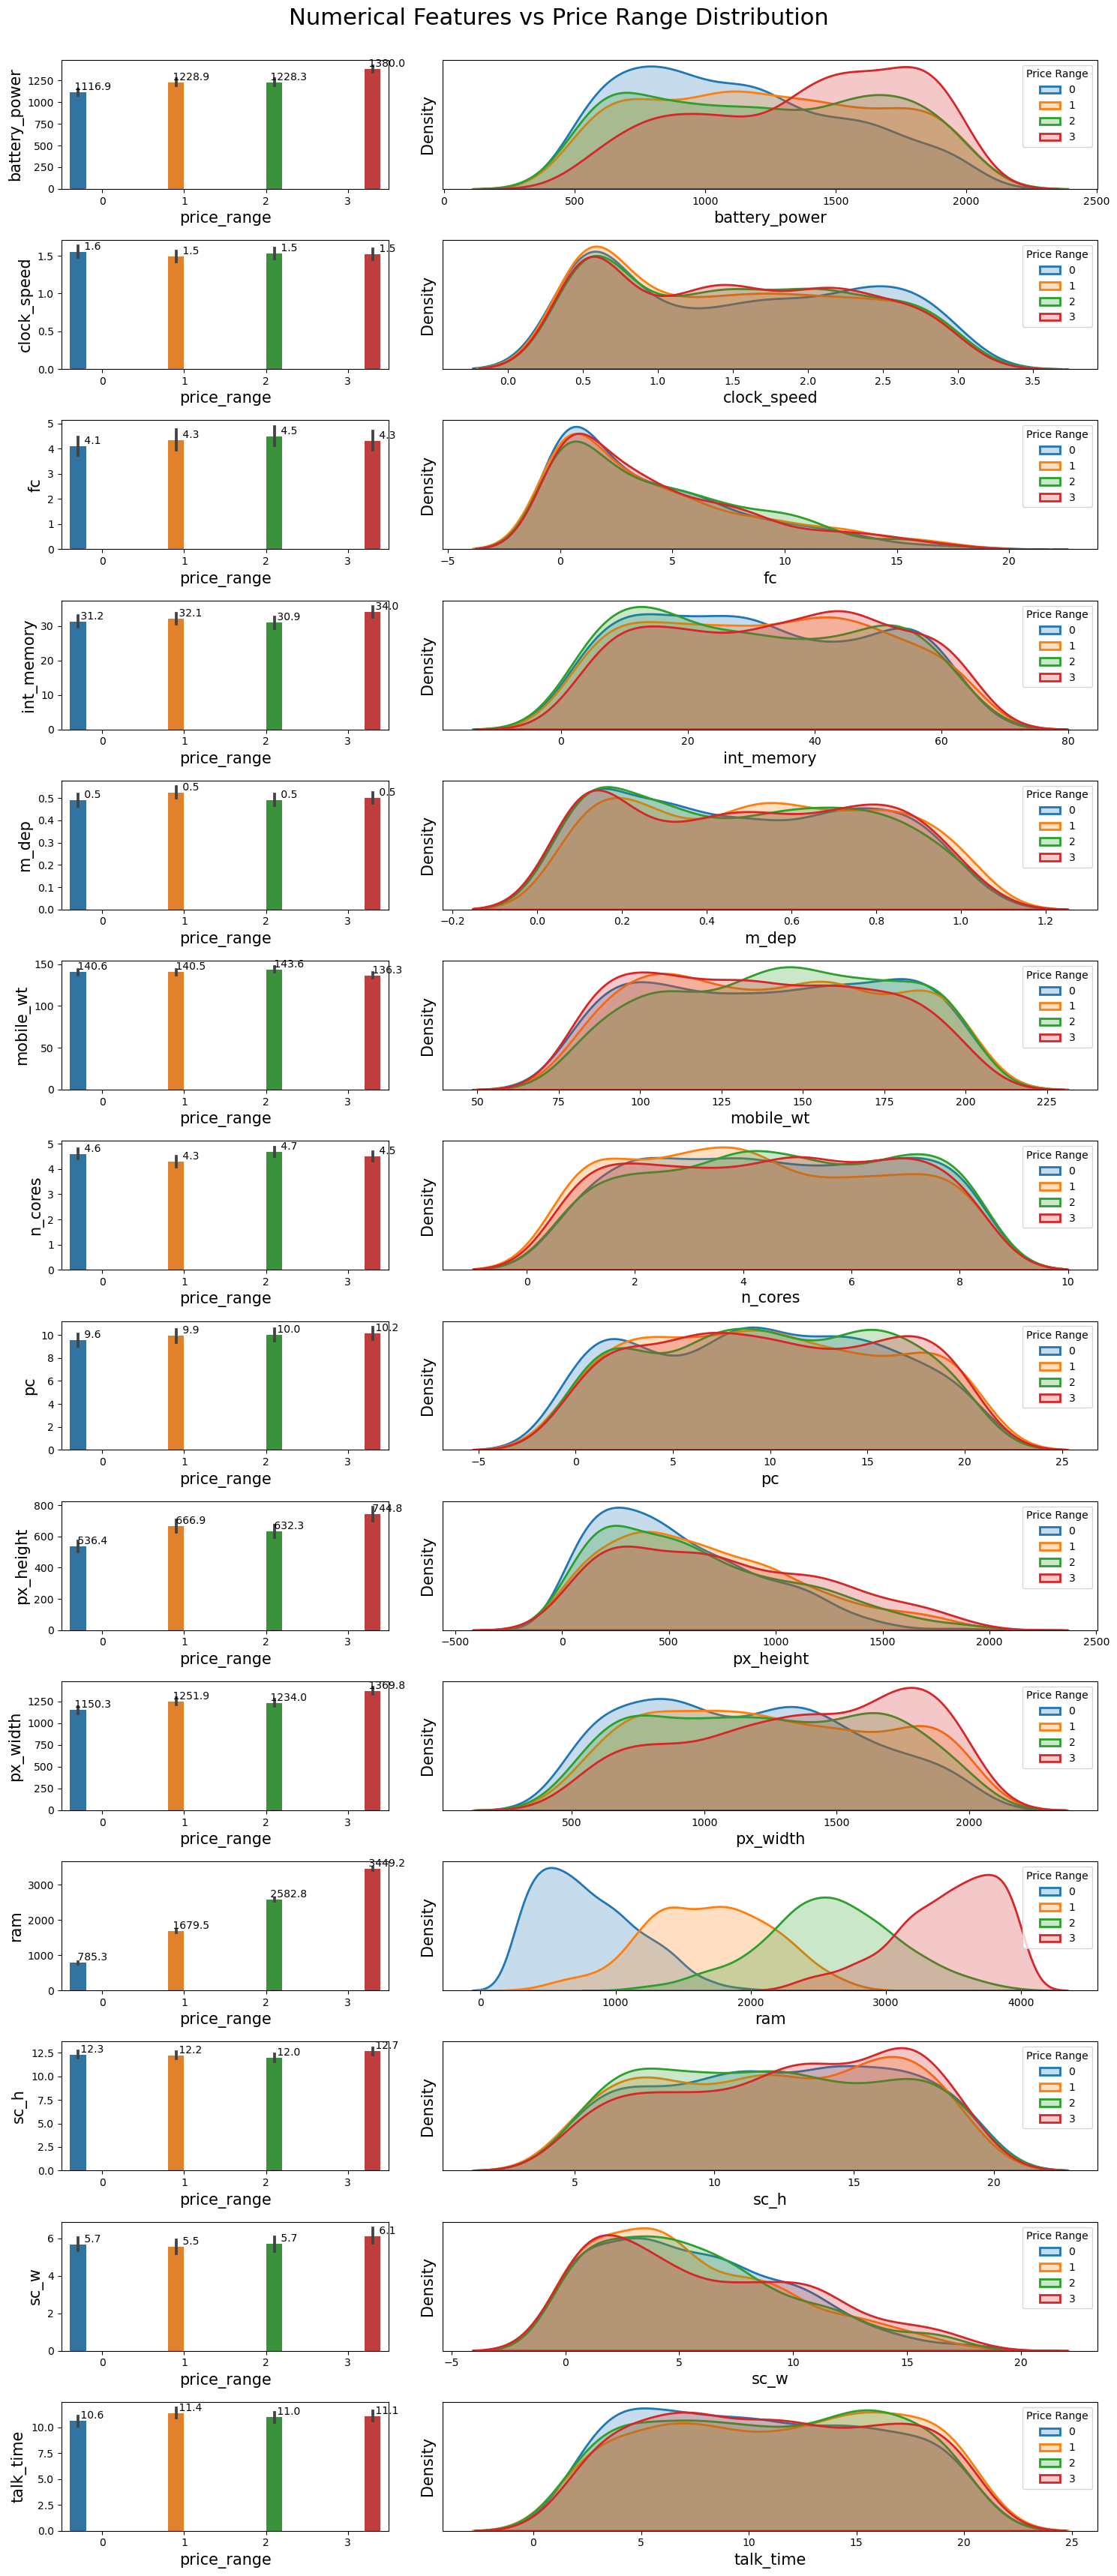

In [18]:
fig, ax = plt.subplots(14, 2, figsize=(15,35), gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(df.drop(columns = categories).columns):
    # barplot
    graph = sns.barplot(data=df, x='price_range', y=col, hue = 'price_range', ax=ax[i, 0])
    graph.legend_.remove()
    # kde Plot
    sns.kdeplot(data=df[df['price_range']==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df['price_range']==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    sns.kdeplot(data=df[df['price_range']==2], x=col, fill=True, linewidth=2, ax=ax[i,1], label='2')
    sns.kdeplot(data=df[df['price_range']==3], x=col, fill=True, linewidth=2, ax=ax[i,1], label='3')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Price Range', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.1f')
        
# Increase font size of x and y labels
for i in range(len(ax)):
    for j in range(len(ax[i])):
        ax[i,j].set_xlabel(ax[i,j].get_xlabel(), fontsize=15)
        ax[i,j].set_ylabel(ax[i,j].get_ylabel(), fontsize=15)

plt.suptitle('Numerical Features vs Price Range Distribution', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

<div style="width: 95%; border-radius:10px; border: #0000FF solid; padding: 12px; background-color: #87CEEB; font-size:110%; color: black; text-align:justify">

* Among the numerical features seen in the above diagram, `ram` and `battery_power` have the most impact on the `price_range`.
</div>

<a id="bivariate_cat"></a>
# <b><span style='color:#0000FF;'>Step 5.2 |</span><span style='color:#0000FF;'>  Categorical Features vs price_range</span></b>

In [ ]:
# Create a 2x4 grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,12))


for i,col in enumerate(categories[:len(categories)-1]):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df['price_range'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['price_range'], normalize='index')

    
    # Plot stacked bar charts
    x, y = i//3, i%3
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.25, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'   {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='Price Range', loc=(0.24,0.92), fontsize=8, ncol=4)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    # Increase xlabel & ylabel font sizes
    ax[x,y].set_ylabel('Proportion', fontsize=15)
    ax[x,y].set_xlabel(col, fontsize=15)        

plt.suptitle('Categorical Features vs Price Range Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

<div style="width: 95%; border-radius:10px; border: #0000FF solid; padding: 12px; background-color: #87CEEB; font-size:110%; color: black; text-align:justify">


* Among the categorical features seen in the above plot, ‍‍‍‍‍‍‍`three_g` has a greater impact on the `price_range` because by changing the category here, the percentage of samples belonging to each class of the `price_range` has changed more significantly.
</div>